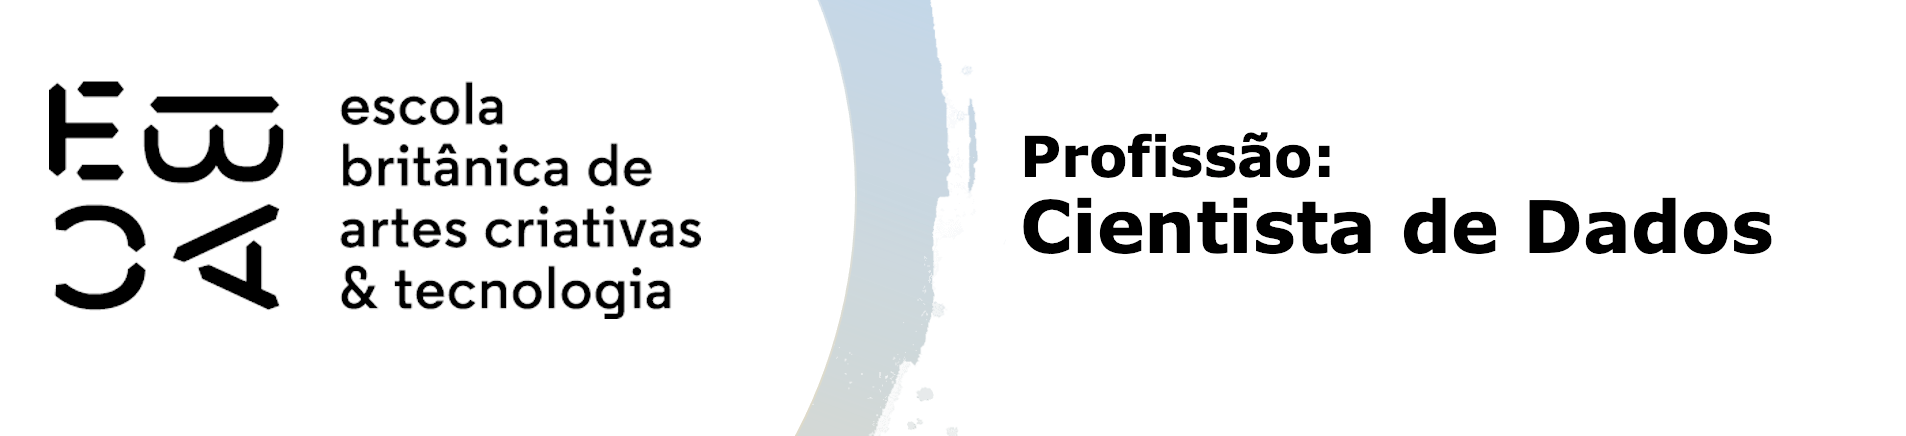

# Módulo 30 - Hierárquicos / aglomerativos

# Métodos hierárquicos de agrupamento - Tarefa

## 0) Carregamento de pacotes e dados
>Nesta atividade serão usados os pacotes:
>- Pandas, para leitura e edição de tabelas; 
>- Seaborn, para carregamento da base de pinguins e formação de gráficos estatísticos;
>- Matplotlib.pyplot, para formação de gráficos gerais dos dados;
>- AglomerativeClustering da classe sklearn.cluster para aplicar métodos aglomerativos de agrupamento;
>- StandardScaler da classe sklearn.preprocessing para padronização dos dados;
>- scipy.cluster.hierarchy, responsável pela formação de dendogramas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

> Os dados necessários encontram-se no dataset "penguins" do Seaborn, na qual estão as características de três espécies diferentes de pinguins. Seja df o dataframe com estes dados.

In [2]:
# Carrega a base de dados dos pinguins
df = sns.load_dataset('penguins')

# Identifica o índice de df
df.index.name='id'

# Mostra as 5 primeiras linhas do df
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

> 1-2. Seleção das variáveis quantitativas da base de pinguins e eliminação dos dados faltantes. Seja esta seleção chamada de df_num.

In [3]:
# Seleciona as variáveis numéricas do df e remove os valores missing
df_num = df.select_dtypes(include='number').dropna()

# Mostra as primeiras linhas do df numérico
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


> 3. Padronização das variáveis numéricas. Vamos chamar este dataframe de df_pad.

In [4]:
# Padroniza o df_num
df_pad = StandardScaler().fit_transform(df_num) 

> 4. Divisão da base padronizada em 3 grupos hierárquicos.

In [5]:
# Prepara uma clusterização de 3 grupos hierárquicos.
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [6]:
# Ajusta a base de pinguins padronizada na clusterização
clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

> Agora que foram formados os 3 grupos vamos identificá-los em df_num e df.

In [7]:
# Insere a coluna "grupos_3" no df_num, identificando qual grupo o pinguim pertence
df_num['grupos_3'] = clus.labels_

# Mostra as primeiras linhas do df
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupos_3
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [8]:
# Insere a coluna 'grupos_3' no df original de acordo com 'id'
df = df.merge(df_num['grupos_3'], how='left', on='id')

# Mostra as primeiras linhas do df combinado
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupos_3
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


> 5. Dendrograma dos 3 grupos formados na base dos pinguins. Vamos chamar este primeiro dendrograma de dend_3.

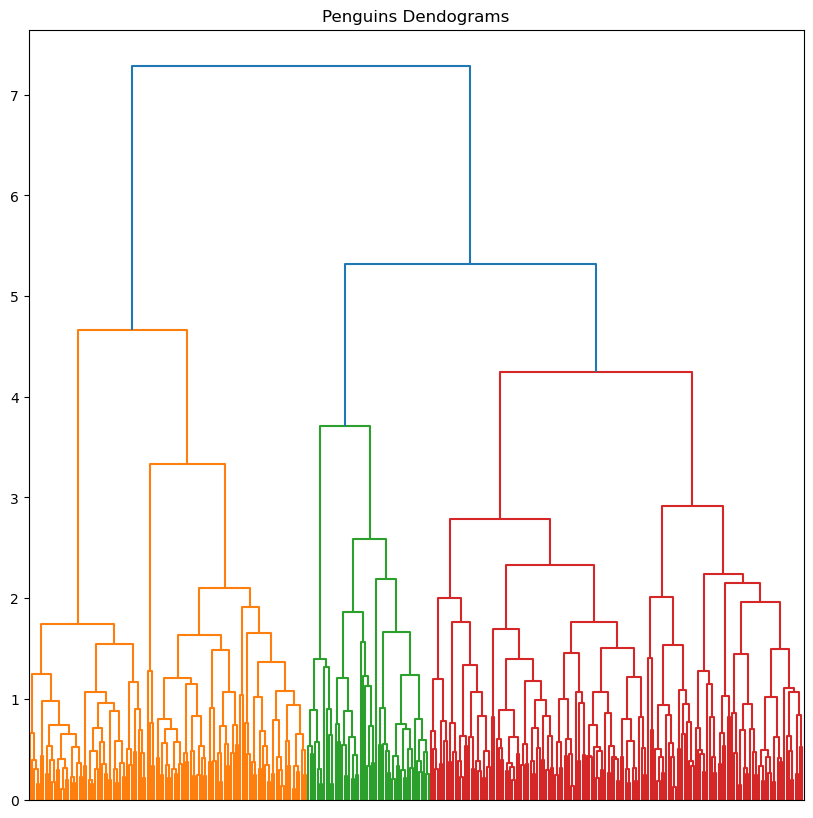

In [9]:
# Cria uma figura com largura e altura iguais a 10 pixels
plt.figure(figsize=(10, 10))

# Título da figura
plt.title("Penguins Dendograms")

# Cria o dendrograma com os dados de df_pad
dend_3 = shc.dendrogram(shc.linkage(df_pad, method='complete'))

# Remove o eixo x, evitando a poluição visual
plt.xticks([])

# Mostra o dendrograma
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

> Para identificar quantos pinguins de cada espécie encontram-se em cada grupo, vamos fazer uma tabela cruzada e um gráfico de barras.

In [10]:
# Crosstab dos grupos pelas espécies dos pinguins.
pd.crosstab(df['species'], df['grupos_3'])

grupos_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


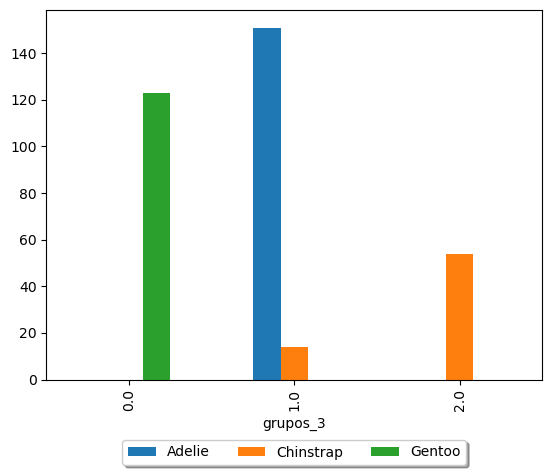

In [11]:
# Faz o gráfico do número de pinguins de cada espécie em cada grupo
graf1 = df.groupby(['grupos_3', 'species'])['species'].count().unstack().plot.bar()
graf1.legend(loc='lower center', bbox_to_anchor=(0.5, -.25), ncol=3, fancybox=True, shadow=True);

> O gráfico e a tabela mostram que cada grupo tem o predomínio de uma determinada espécie. Tal como é visto nos grupos 0, na qual há o predomínio da espécie Gentoo, e 2, com predomínio da espécie Chinstrap. O grupo 1 é exceção, dado que nele há duas espécies (Adelie e Chinstrap), mas com claro predomínio da Adelie.

> A descrição das variáveis quantitativas de cada grupo será feita por meio de gráficos de dispersão.

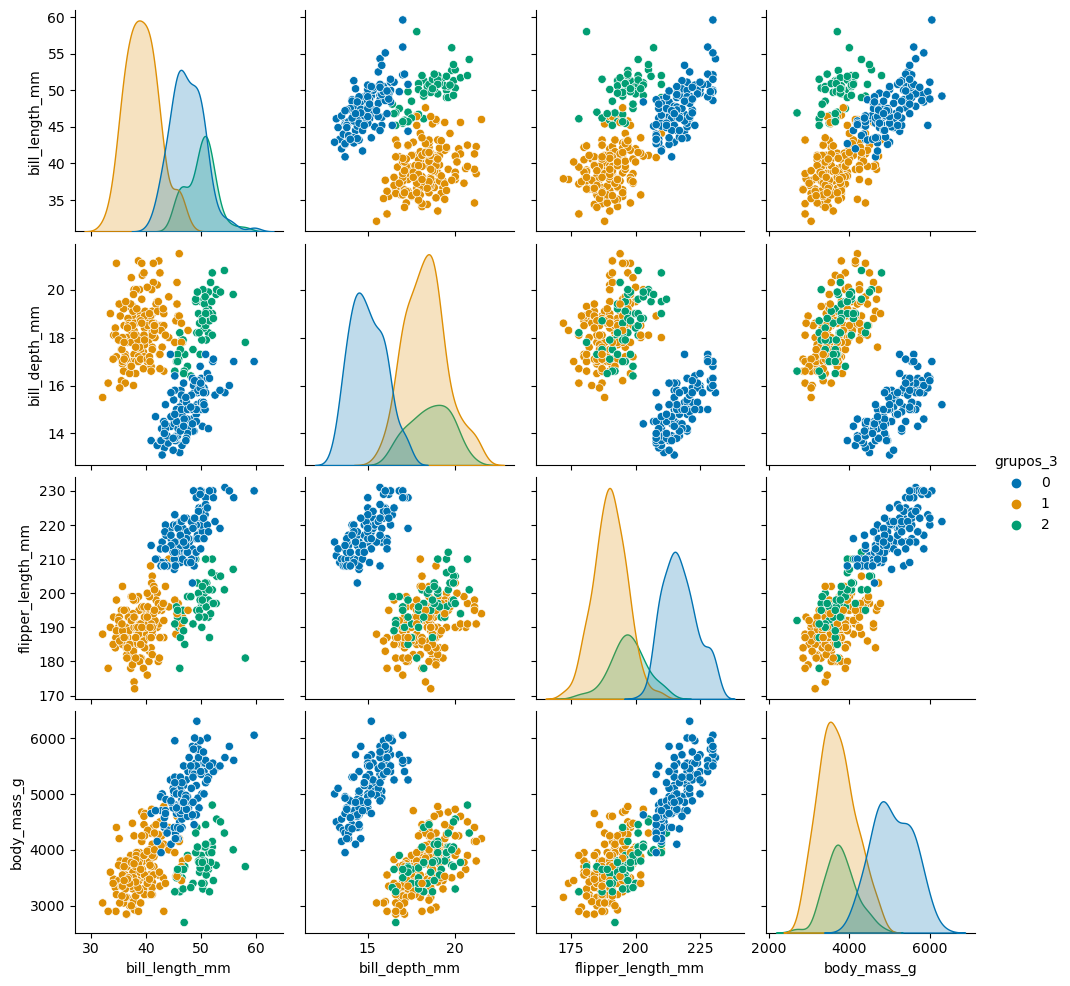

In [12]:
# Gráfico de dispersão das variáveis numéricas da base de dados dos pinguins
# As variáveis estão separadas pelos grupos criados
sns.pairplot(data=df_num, hue='grupos_3', palette='colorblind')

O gráfico de dispersão mostra que os grupos 1 e 2 têm as variáveis numéricas em intervalos semelhantes, a ponto haver mistura entre os pontos desses dois grupos. Isso está em concordância com a distribuição das espécies entre os grupos vista anteriormente, na qual o grupo 1 apresenta pinguins tanto da espécie Chinstrap quanto da Adelie.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

> Vamos criar um novo dendrograma e notar em quantos grupos ele divide os dados da base padronizada.

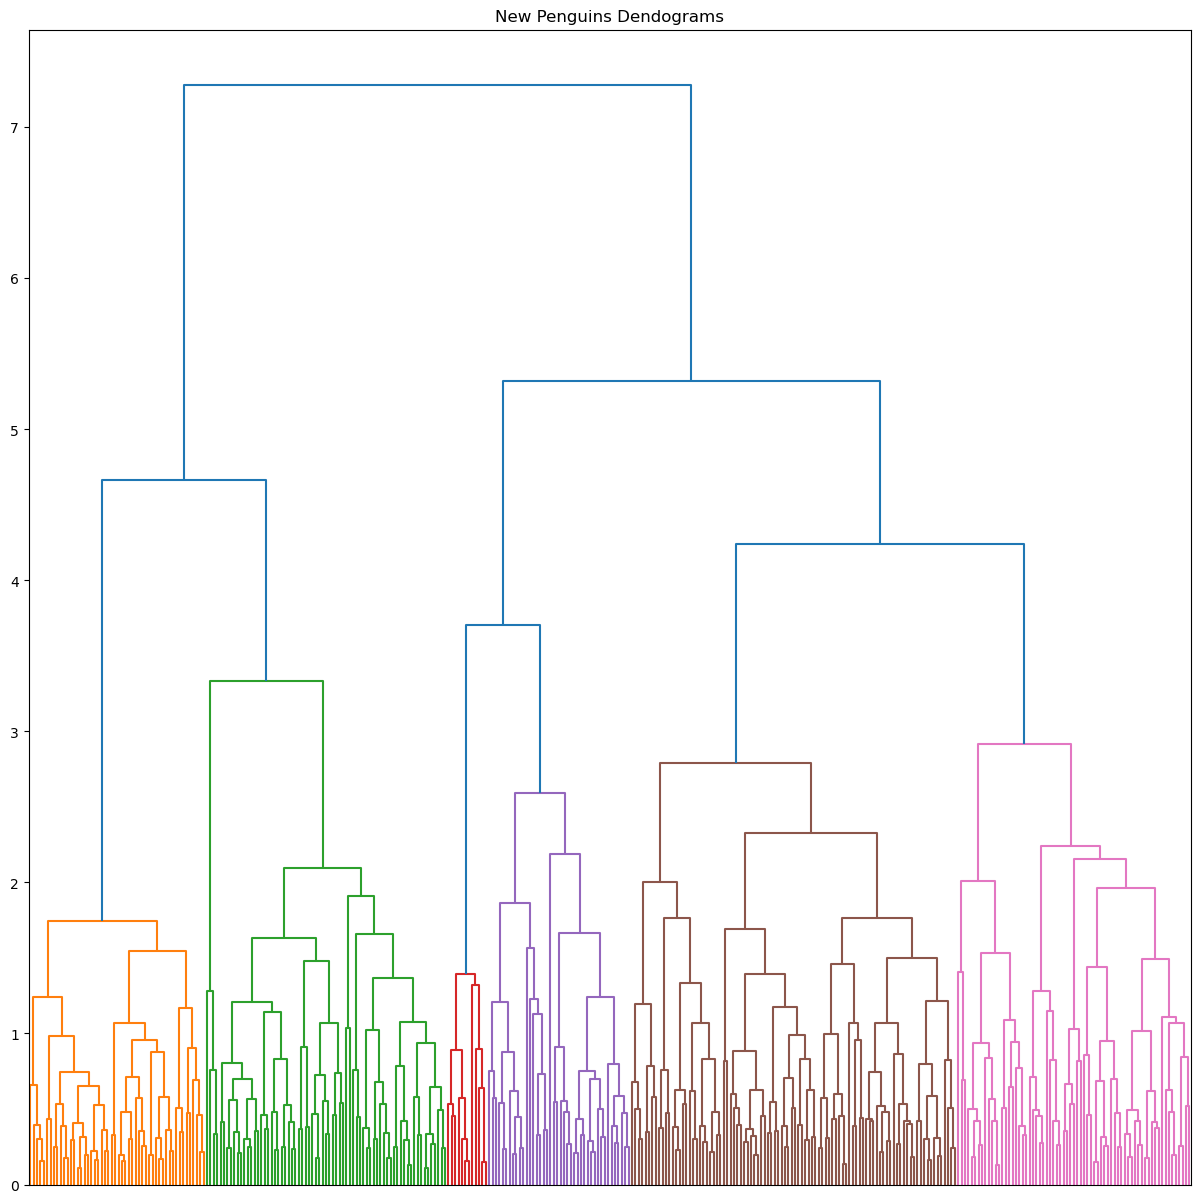

In [19]:
# Cria uma figura com largura e altura iguais a 10 pixels
plt.figure(figsize=(15, 15))

# Título da figura
plt.title("New Penguins Dendograms")

# Prepara os dados do df_pad para o dendograma
Z = shc.linkage(df_pad, method='complete')

# Cria o dendrograma com os dados de df_pad
new_dend = shc.dendrogram(Z, color_threshold=3.5)

# Remove o eixo x, evitando a poluição visual
plt.xticks([])

# Mostra o dendrograma
plt.show()

> O novo dendograma dividiu os parâmetros numéricos da base dos pinguins em 6 grupos. Vamos avaliar cada grupo tal qual foi feito anteriormente. Para isso, vamos clusterizar as variáveis numéricas em 6 grupos e colocá-los no dataframe numérico e no original.

In [20]:
# Prepara uma clusterização de 6 grupos hierárquicos.
new_clus = AgglomerativeClustering(linkage="complete", 
                                   distance_threshold = None, 
                                   n_clusters=6)

# Ajusta a base de pinguins padronizada na clusterização
new_clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [21]:
# Insere a coluna "grupos_6" no df_num, identificando qual grupo o pinguim pertence
df_num['grupos_6'] = new_clus.labels_

# Mostra as primeiras linhas do df
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupos_3,grupos_6
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,1
1,39.5,17.4,186.0,3800.0,1,1
2,40.3,18.0,195.0,3250.0,1,1
4,36.7,19.3,193.0,3450.0,1,1
5,39.3,20.6,190.0,3650.0,1,2


In [22]:
# Insere a coluna 'grupos_6' no df original de acordo com 'id'
df = df.merge(df_num['grupos_6'], how='left', on='id')

# Mostra as primeiras linhas do df combinado
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupos_3,grupos_6
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0


> Dado que as clusterizações estão prontas, vamos contar quantos pinguins de cada sexo e espécies encontram-se em cada grupo.

In [23]:
# Crosstab dos 6 grupos pelas espécies dos pinguins.
pd.crosstab(df['species'], df['grupos_6'])

grupos_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


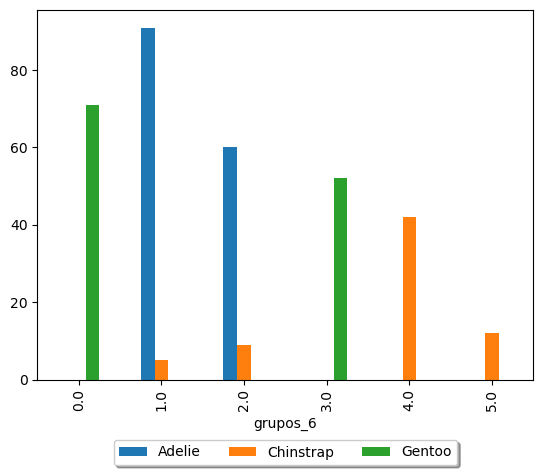

In [24]:
# Faz o gráfico do número de pinguins de cada espécie em cada grupo
graf2 = df.groupby(['grupos_6', 'species'])['species'].count().unstack().plot.bar()
graf2.legend(loc='lower center', bbox_to_anchor=(0.5, -.25), ncol=3, fancybox=True, shadow=True);

In [28]:
# Crosstab dos 6 grupos pelas espécies e sexo dos pinguins.
pd.crosstab(index=[df['species'], df['sex']], columns=df['grupos_6'])

grupos_6          0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

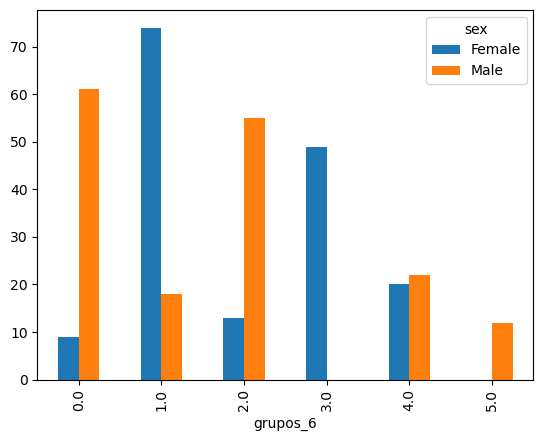

In [35]:
# Gráfico de barras da contagem do sexo dos pinguins em cada grupo
graf3 = df.groupby(['grupos_6', 'sex'])['sex'].count().unstack().plot.bar()

> Para uma última análise, vejamos como estão as distribuições das variáveis numéricas em cada grupo. Por prevenção de análises erradas, vamos fazer uma cópia do dataframe numérico sem a coluna 'grupos_3'. 

In [37]:
# Cria um novo dataframe numérico sem os 3 grupos originais
df_num2 = df_num.drop(labels='grupos_3', axis=1)

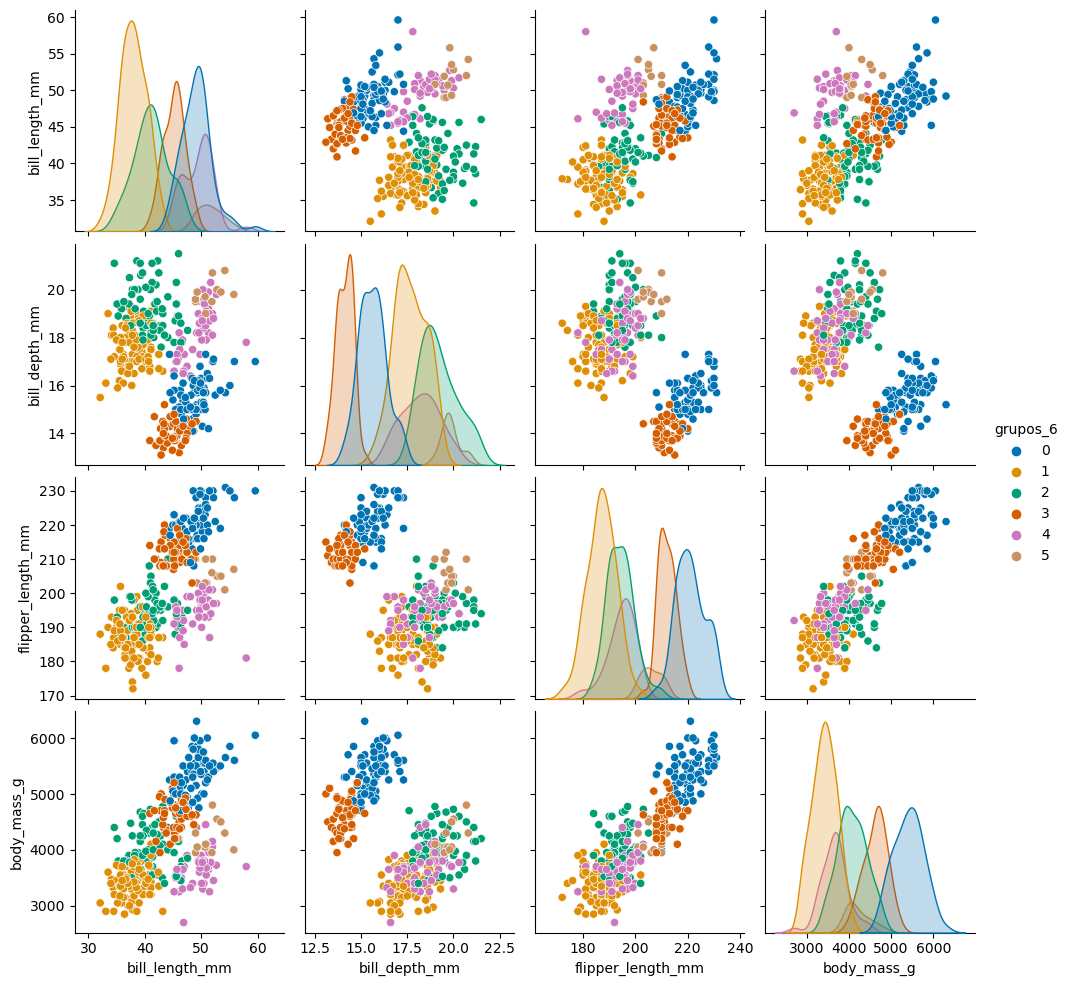

In [38]:
# Gráfico de dispersão das variáveis numéricas da base de dados dos pinguins
# As variáveis estão separadas pelos grupos criados
sns.pairplot(data=df_num2, hue='grupos_6', palette='colorblind')

> Avaliando os resultados de cada contagem, vemos que:
> - Grupo 0: Composto por 70 pinguins, sendo 9 femêas e 61 machos da espécie Gentoo;
> - Grupo 1: há 92 pinguins, com 18 machos e 69 fêmeas da espécie Adelie, 5 Chinstrap fêmeas;
> - Grupo 2: 68 pinguins, onde 9 deles são Chinstrap fêmeas, 55 Adelie machos e 4 Adelie fêmeas;
> - Grupo 3: 49 pinguins fêmeas da espécie Gentoo;
> - Grupo 4: 42 pinguins da espécie Chinstrap, com 22 machos e 20 fêmeas;
> - Grupo 5: 12 Chinstrap machos.
> De acordo com essas divisões, é notável o predomínio do sexo de uma determinada espécie em cada grupo. As misturas das espécies presentes em quase todos os grupos se deve às semelhanças que há entre as características deles (tal como comprimento do bico, da asa, etc), que, mesmo assim, são combinações pequenas (com exceção do grupo 4). Em vista disso tudo, é possível afirmar que o agrupamento capturou padrões naturais do sexo de cada espécie, realizando divisões plausíveis. 